# Abstract 

This work pursues the study of the DFT that is often implemented as the FFT in most computers. The spectra of various signals are studied using DFT, their phase and magnitude spectra plotted.

# Introduction

The DFT is the sampling of the DTFT. When implemented suitably, it is the FFT and is generally implemented on computers very effectively. Here we write 
\begin{align}
f[n] &= \frac{1}{N}\sum_{k=0}^{N-1} F[k] W^{-nk}\\
F[n] &= \sum_{n=0}^{N-1} f[k] W^{nk}
\end{align}

We apply this to various functions and analyse the resulting spectra.

# Method and code

Firstly we make the necessary imports and define all the useful functions. 

In [2]:

from __future__ import division
% matplotlib inline
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18})
import scipy.signal as sp
from sympy import *
init_session
size=(10,8)
from pylab import *

In [3]:

# defining useful functions

def plotfigure(figsize,xlabel,ylabel,title,x,y,style="k-",graph="plot"):
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if graph=="plot":
        plt.plot(x,y,style)
    if graph== "semilogx":
        plt.semilogx(x,y,style)
    if graph== "semilogy":
        plt.semilogy(x,y,style)
    if graph== "loglog":
        plt.loglog(x,y,style)
    plt.tight_layout()
    plt.show()
    plt.close()
    
def dodft(y,N,lim1,lim2,xlimit=10,title1="Spectrum"):
    Y=fftshift(fft(fftshift(y)))/N
    w=linspace(lim1,lim2,N)
    figure(figsize= (10,8))
    subplot(2,1,1)
    plot(w,abs(Y),lw=2)
    xlim([-xlimit, xlimit])
    ylabel(r"$|Y|$",size=16)
    title(title1)
    grid(True)
    subplot(2,1,2)
    plot(w,angle(Y),"ro",lw=2)
    ii=where(abs(Y)>1e-3)
    plot(w[ii],angle(Y[ii]),"go",lw=2)
    xlim([-xlimit,xlimit])
    ylabel(r"Phase of $Y$",size=16)
    xlabel(r"$k$",size=16)
    grid(True)
    show()

Here, the DFT is unwrapped incorrectly and further the phase point 0 ($2\pi$) is considered two times. 

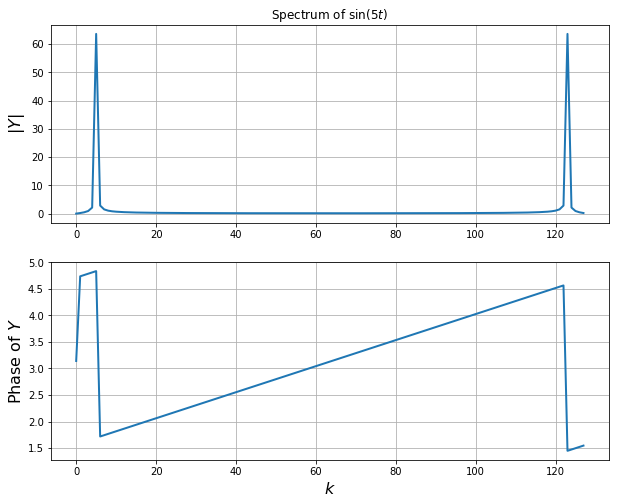

In [4]:

x=linspace(0,2*pi,128)
y=sin(5*x)
Y=fft(y)
figure(figsize = (10,8))
subplot(2,1,1)
plot(abs(Y),lw=2)
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin(5t)$")
grid(True)
subplot(2,1,2)
plot(unwrap(angle(Y)),lw=2)
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$k$",size=16)
grid(True)
show()

Here, the the point $2\pi$ is omitted. Further, the frequency axis is shifted to display the spectra suitably.

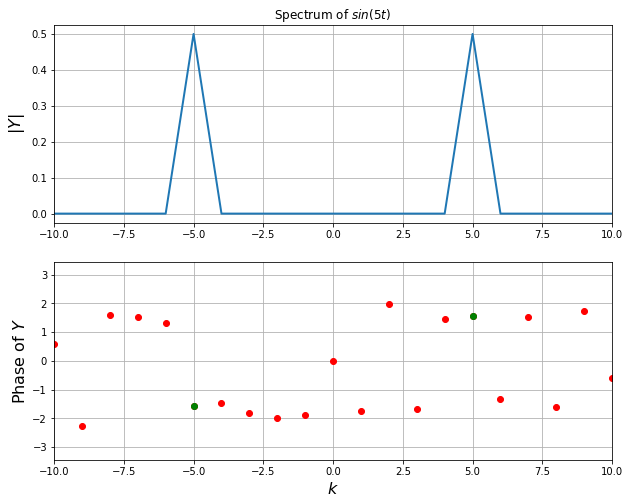

In [5]:

x=linspace(0,2*pi,129);x=x[:-1]
y=sin(5*x)
dodft(y,128,-64,63,10,r"Spectrum of $sin(5t)$")

Here, the sidebands are hidden due to insufficient resolution in frequency. This is to be corrected. Increasing the number of time samples doesn't help as we are essentially giving a slower signal to the FFT which retains the shape but doesn't really change much else.

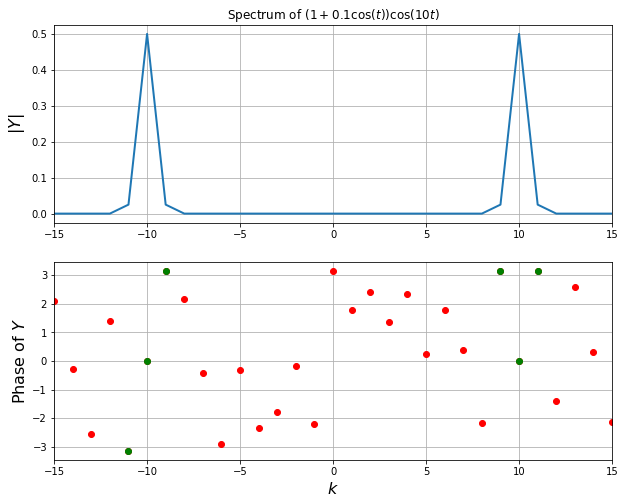

In [6]:
y=(1+0.1*cos(x))*cos(10*x)
dodft(y,128,-64,63,15,r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$")


A correction is made by increasing the number of points given to the FFT by increasing the time interval. 

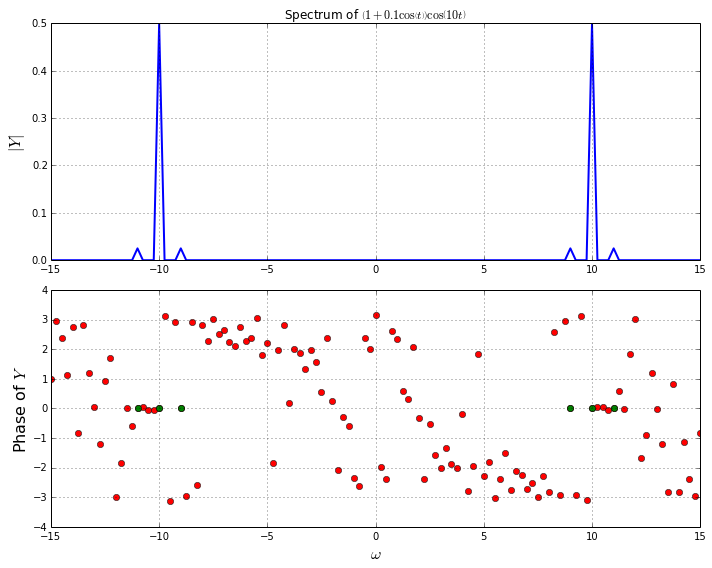

In [6]:
t=linspace(-4*pi,4*pi,513);t=t[:-1]
y=(1+0.1*cos(t))*cos(10*t)
Y=fftshift(fft(y))/512.0
w=linspace(-64,64,513);w=w[:-1]
figure(figsize=(10,8))
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-15,15])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),"ro",lw=2)
ii=where(abs(Y)>1e-3)
plot(w[ii],angle(Y[ii]),"go",lw=2)
xlim([-15,15])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
tight_layout()
show()

We make use of the fact that 
\begin{align}
sin^{3}(x)&= \frac{3sin(x) - sin(3x)}{4}\\
cos^{3}(x)&= \frac{cos(3x) + 3cos(x)}{4}
\end{align}

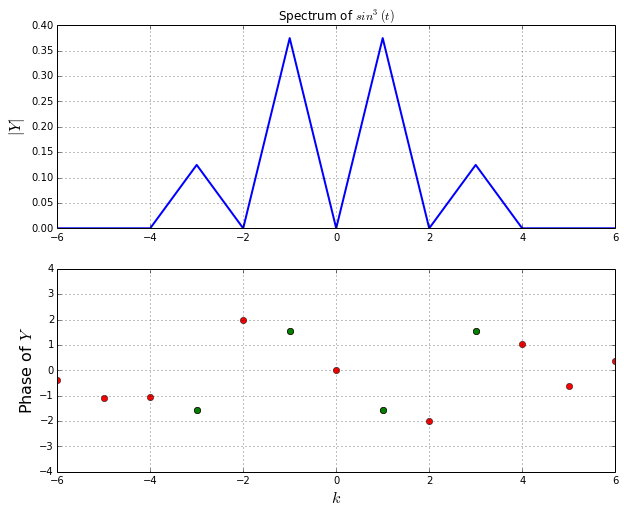

In [11]:

x=linspace(0,2*pi,129);x=x[:-1]
y=(sin(x))**3
dodft(y,128,-64,63,6,r"Spectrum of $sin^3(t)$")

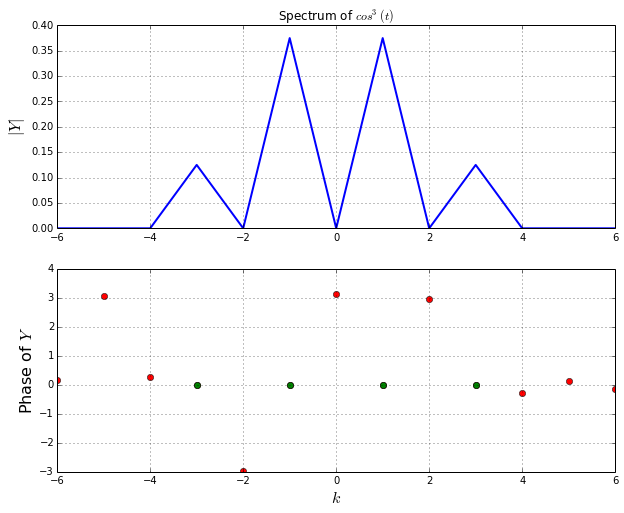

In [12]:

x=linspace(0,2*pi,129);x=x[:-1]
y=(cos(x))**3
dodft(y,128,-64,63,6,r"Spectrum of $cos^3(t)$")

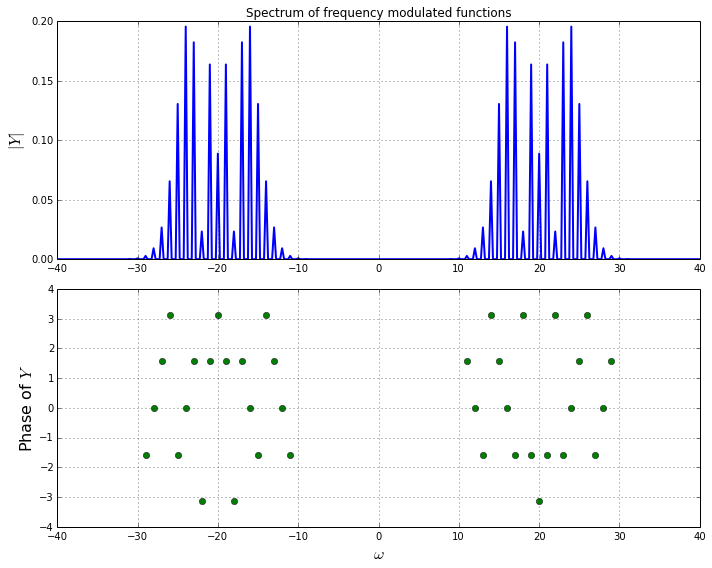

In [9]:
t=linspace(-4*pi,4*pi,513);t=t[:-1]
y=(cos(20*t + 5*cos(t)))
Y=fftshift(fft(y))/512.0
w=linspace(-64,64,513);w=w[:-1]
figure(figsize=(10,8))
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-40,40])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of frequency modulated functions")
grid(True)
subplot(2,1,2)
ii=where(abs(Y)>1e-3)
plot(w[ii],angle(Y[ii]),"go",lw=2)
xlim([-40,40])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
tight_layout()
show()

It is evident that the sidebands have amplitudes that go as the bessel coefficients which matches the expected output. The following code finds the DFT of the Gaussian. By suitably adjusting the frequency range and so on, we get nearly no error. 

[ -2.61590137e-16 +0.00000000e+00j  -5.23180275e-16 +8.61794080e-18j
   0.00000000e+00 +2.86064942e-17j ...,   0.00000000e+00 +1.22544120e-15j
   0.00000000e+00 +1.34423081e-15j   0.00000000e+00 +1.39008335e-15j]
8.65973959208e-15


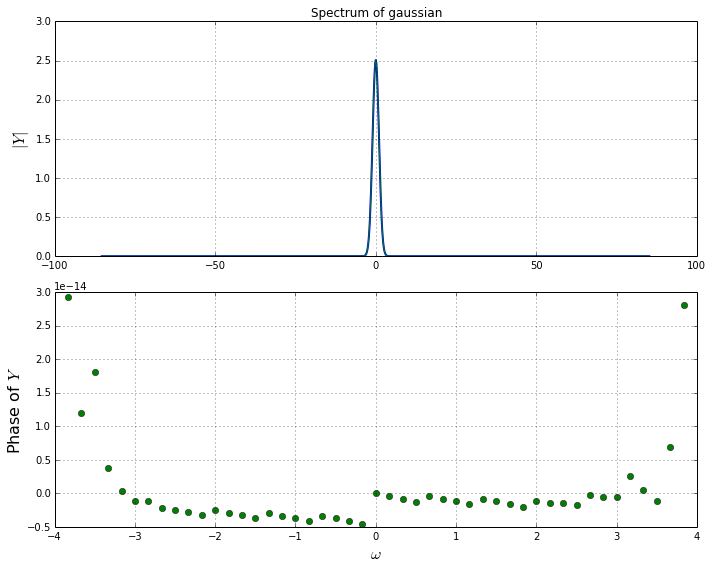

In [10]:
n=3
t=linspace(-2*n*pi,2*n*pi,2**(n+7)+1);t=t[:-1]
y=exp(-(t*t)/2)

Y=fftshift(fft(fftshift(y)))*2*(2*n*pi)/((2**(n+7)))
print Y
w=linspace(-(2**(n+5))/n,(2**(n+5))/n,2**(n+7)+1);w=w[:-1]
ft= sqrt(2*pi)*exp(-w*w/(2))

print max(abs(ft - abs(Y)))
figure(figsize=(10,8))
subplot(2,1,1)
plot(w,abs(Y),lw=2)
plot(w,ft)
xlim([-100,100])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of gaussian")
grid(True)
subplot(2,1,2)
ii=where(abs(Y)>1e-3)
plot(w[ii],angle(Y[ii]),"go",lw=2)
#xlim([-10,10])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
tight_layout()
show()

# Results and discussion

As expected, the DFT of the sinusoidal function is a couple of deltas with phases of $\frac{\pi}{2}$ and $-\frac{\pi}{2}$. The AM DFT glosses over the sidebands as our frequency resolution is insufficient. By increasing the time period while keeping the sampling period the same, we sample the unit circle representing frequencies in the discrete time domain more often and thus obtain clearer resolution. Since we have only cosines the phase plot turns out to have only zeros.

Similar work for $sin^{3}(x)$ and $cos^{3}(x)$ yields spectra where $\omega = 1$ has thrice the amplitude than at $\omega = 3$. The phase plots match those of cosines and sines. The DFT of the FM wave is one with the carrier frequency and sidebands separated by the modulating frequency that have amplitudes that follow the corresponding bessel functions.

The DFT of the Gaussian is of course a Gaussian. That being said the choice of the number of samples is based on the number of observations to be made. The last bit of code displays the output for n=17. Thus a study of the DFT using python has been made.